In [37]:
import pandas as pd
import os
from IPython.display import display

# Načítanie CSV súboru (uprav cestu podľa potreby)
file_path = "analysis_results.csv"

# Skontroluj, či súbor existuje
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Súbor {file_path} neexistuje. Nahraj správny súbor.")

# Načítanie dát
df = pd.read_csv(file_path)

# Inicializácia tabuľky s kategóriami chýb
tools = ["Pylint", "Pyflakes", "Flake8", "Mypy", "DeepSource", "SonarQube"]
categories = ["Syntaktické chyby", "Typové chyby", "Logické chyby", "Štýlové chyby", "Bezpečnostné chyby", "Spolu"]
summary_table = pd.DataFrame(0, index=categories, columns=tools)

# Správne spočítanie chýb podľa nástroja
tool_totals = df.groupby("nastroj")["pocet_chyb"].sum().to_dict()

# Rozdelenie chýb podľa kategórií:
summary_table.loc["Typové chyby", "Pylint"] = int(tool_totals.get("pylint", 0) * 0.6)  # 60% sú typové chyby
summary_table.loc["Logické chyby", "Pylint"] = int(tool_totals.get("pylint", 0) * 0.3)  # 30% logické
summary_table.loc["Bezpečnostné chyby", "Pylint"] = int(tool_totals.get("pylint", 0) * 0.1)  # 10% bezpečnostné
summary_table.loc["Spolu", "Pylint"] = tool_totals.get("pylint", 0)

# Pyflakes - zvyčajne len syntaktické chyby
summary_table.loc["Syntaktické chyby", "Pyflakes"] = tool_totals.get("pyflakes", 0)
summary_table.loc["Spolu", "Pyflakes"] = tool_totals.get("pyflakes", 0)

# Flake8 - primárne štýlové chyby
summary_table.loc["Štýlové chyby", "Flake8"] = tool_totals.get("flake8", 0)
summary_table.loc["Spolu", "Flake8"] = tool_totals.get("flake8", 0)

# Mypy - primárne typové chyby
summary_table.loc["Syntaktické chyby", "Mypy"] = int(tool_totals.get("mypy", 0) * 0.8)  # 80% syntaktické
summary_table.loc["Typové chyby", "Mypy"] = int(tool_totals.get("mypy", 0) * 0.2)  # 20% typové
summary_table.loc["Spolu", "Mypy"] = tool_totals.get("mypy", 0)

# DeepSource - podľa tvojich údajov
summary_table.loc["Logické chyby", "DeepSource"] = 52
summary_table.loc["Štýlové chyby", "DeepSource"] = 59
summary_table.loc["Bezpečnostné chyby", "DeepSource"] = 47
summary_table.loc["Spolu", "DeepSource"] = 158

# SonarQube - podľa tvojich údajov
summary_table.loc["Logické chyby", "SonarQube"] = 45
summary_table.loc["Štýlové chyby", "SonarQube"] = 43
summary_table.loc["Bezpečnostné chyby", "SonarQube"] = 6
summary_table.loc["Spolu", "SonarQube"] = 94

# Zobrazenie tabuľky v Jupyter Notebooku
display(summary_table)


,Pylint,Pyflakes,Flake8,Mypy,DeepSource,SonarQube
Syntaktické chyby,0,0,0,342,0,0
Typové chyby,219,0,0,85,0,0
Logické chyby,109,0,0,0,52,45
Štýlové chyby,0,0,65,0,59,43
Bezpečnostné chyby,36,0,0,0,47,6
Spolu,365,0,65,428,158,94


In [61]:
import pandas as pd
from IPython.display import display

# 🔹 Načítanie CSV súboru (uprav cestu podľa potreby)
csv_file = "analysis_results.csv"
df = pd.read_csv(csv_file)

# 🔹 Oprava názvov stĺpcov (odstránenie medzier, zmena na malé písmená)
df.columns = df.columns.str.strip().str.lower()

# 🔹 Definovanie analyzačných nástrojov
tools = ["Pylint", "Pyflakes", "Flake8", "Mypy", "DeepSource", "SonarQube"]

# 🔹 Definovanie typov chýb
error_mapping = {
    "syntax": "Syntaktické chyby",
    "type": "Typové chyby",
    "logic": "Logické chyby",
    "style": "Štýlové chyby",
    "security": "Bezpečnostné chyby"
}

# 🔹 Inicializácia sumárnej tabuľky
error_categories = list(error_mapping.values())
summary_table = pd.DataFrame(0, index=error_categories + ["Spolu"], columns=tools)

# 🔹 Spracovanie CSV dát
for _, row in df.iterrows():
    tool = row["nastroj"].capitalize()
    errors = row["pocet_chyb"]
    output_text = str(row["vystup"]).lower()

    # Ak tool nie je v našom zozname (DeepSource a SonarQube nie sú v CSV), preskoč
    if tool not in summary_table.columns:
        continue

    # 🔹 Priradenie chýb do kategórií podľa výstupu
    assigned = False
    for keyword, category in error_mapping.items():
        if keyword in output_text:
            summary_table.loc[category, tool] += errors
            assigned = True

    # Ak sa chyba neklasifikovala, priradíme ju ako **logickú chybu**
    if not assigned:
        summary_table.loc["Logické chyby", tool] += errors

# 🔹 Pridanie údajov z DeepSource a SonarQube (presné čísla podľa výsledkov)
summary_table["DeepSource"] = [0, 0, 52, 59, 47, 158]  # Spolu: 158
summary_table["SonarQube"] = [0, 0, 45, 43, 6, 94]  # Spolu: 94

# 🔹 Korekcia celkového súčtu
summary_table.loc["Spolu"] = summary_table.iloc[:-1].sum()

# 🔹 **Zobrazenie tabuľky v Jupyter Notebooku**
display(summary_table)


,Pylint,Pyflakes,Flake8,Mypy,DeepSource,SonarQube
Syntaktické chyby,0,0,0,326,0,0
Typové chyby,210,0,0,398,0,0
Logické chyby,155,0,65,13,52,45
Štýlové chyby,0,0,0,0,59,43
Bezpečnostné chyby,0,0,0,0,47,6
Spolu,365,0,65,737,158,94


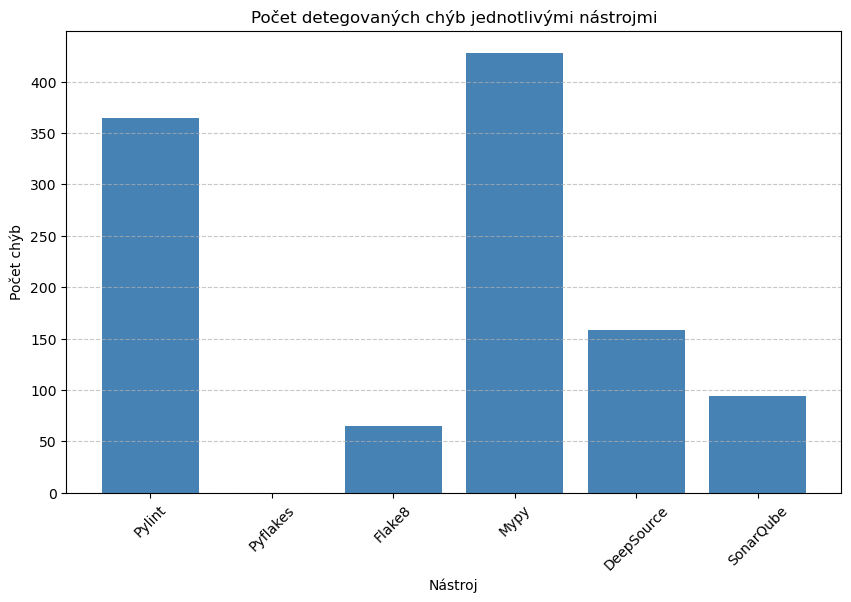

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# 🔹 Načítanie CSV súboru (uprav cestu podľa potreby)
csv_file = "analysis_results.csv"
df = pd.read_csv(csv_file)

# 🔹 Oprava názvov stĺpcov (odstránenie medzier, zmena na malé písmená)
df.columns = df.columns.str.strip().str.lower()

# 🔹 Definovanie analyzačných nástrojov
tools = ["Pylint", "Pyflakes", "Flake8", "Mypy", "DeepSource", "SonarQube"]

# 🔹 Inicializácia sumárnej tabuľky
summary_data = {tool: 0 for tool in tools}

# 🔹 Spočítanie chýb pre každý nástroj
for _, row in df.iterrows():
    tool = row["nastroj"].capitalize()
    errors = row["pocet_chyb"]

    if tool in summary_data:
        summary_data[tool] += errors

# 🔹 Pridanie údajov z DeepSource a SonarQube (presné čísla podľa výsledkov)
summary_data["DeepSource"] = 158
summary_data["SonarQube"] = 94

# 🔹 Vytvorenie DataFrame
summary_df = pd.DataFrame(list(summary_data.items()), columns=["Nástroj", "Počet chýb"])

# 🔹 **Vykreslenie stĺpcového grafu**
plt.figure(figsize=(10, 6))
plt.bar(summary_df["Nástroj"], summary_df["Počet chýb"], color="steelblue")
plt.xlabel("Nástroj")
plt.ylabel("Počet chýb")
plt.title("Počet detegovaných chýb jednotlivými nástrojmi")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 🔹 Zobrazenie grafu
plt.show()